In [9]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/liked_songs.csv")
df.head()

,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_href,analysis_url,duration_ms,time_signature,liked_at,name,artists,popularity,artist_id,genres
0,76YGvWy36ftupwff9SCl7J,0.559,0.905,6,-5.362,0,0.1500,0.015500,0.002830,0.3160,...,https://api.spotify.com/v1/tracks/76YGvWy36ftu...,https://api.spotify.com/v1/audio-analysis/76YG...,150261,4,2023-07-18T17:01:29Z,『82.99 F.M』,Macross 82-99,59,5C8KyBfvAz9PSaOd30eIow,"['future funk', 'kawaii future bass', 'vaporwa..."
1,0D5YcW57alDCPA6XQwwKcZ,0.648,0.341,1,-14.395,1,0.0363,0.844000,0.564000,0.1280,...,https://api.spotify.com/v1/tracks/0D5YcW57alDC...,https://api.spotify.com/v1/audio-analysis/0D5Y...,125408,4,2023-07-17T12:57:27Z,Woodpecker,Explosions In The Sky,48,1uQWmt1OhuHGRKmZ2ZcL6p,"['american post-rock', 'cinematic post-rock', ..."
2,0DxN6Ywom8nnndyQXdSBPy,0.382,0.932,4,-3.726,0,0.0716,0.000035,0.000000,0.2430,...,https://api.spotify.com/v1/tracks/0DxN6Ywom8nn...,https://api.spotify.com/v1/audio-analysis/0DxN...,218707,4,2023-07-13T21:34:30Z,Breathing,Yellowcard,65,3zxKH0qp3nBCuPZCZT5Vaf,"['alternative metal', 'bow pop', 'pop punk', '..."
3,1oTo3ijRbaDAtrjJrGAPSw,0.664,0.781,11,-6.547,1,0.0339,0.001030,0.000005,0.0867,...,https://api.spotify.com/v1/tracks/1oTo3ijRbaDA...,https://api.spotify.com/v1/audio-analysis/1oTo...,227240,4,2023-07-13T21:34:24Z,I Miss You,blink-182,75,6FBDaR13swtiWwGhX1WQsP,"['alternative metal', 'modern rock', 'pop punk..."
4,1P30N7kY4XwOw7vwmjRxPH,0.355,0.666,0,-6.263,1,0.0364,0.000092,0.000000,0.1160,...,https://api.spotify.com/v1/tracks/1P30N7kY4XwO...,https://api.spotify.com/v1/audio-analysis/1P30...,216693,3,2023-07-13T21:12:43Z,Empty Apartment,Yellowcard,54,3zxKH0qp3nBCuPZCZT5Vaf,"['alternative metal', 'bow pop', 'pop punk', '..."


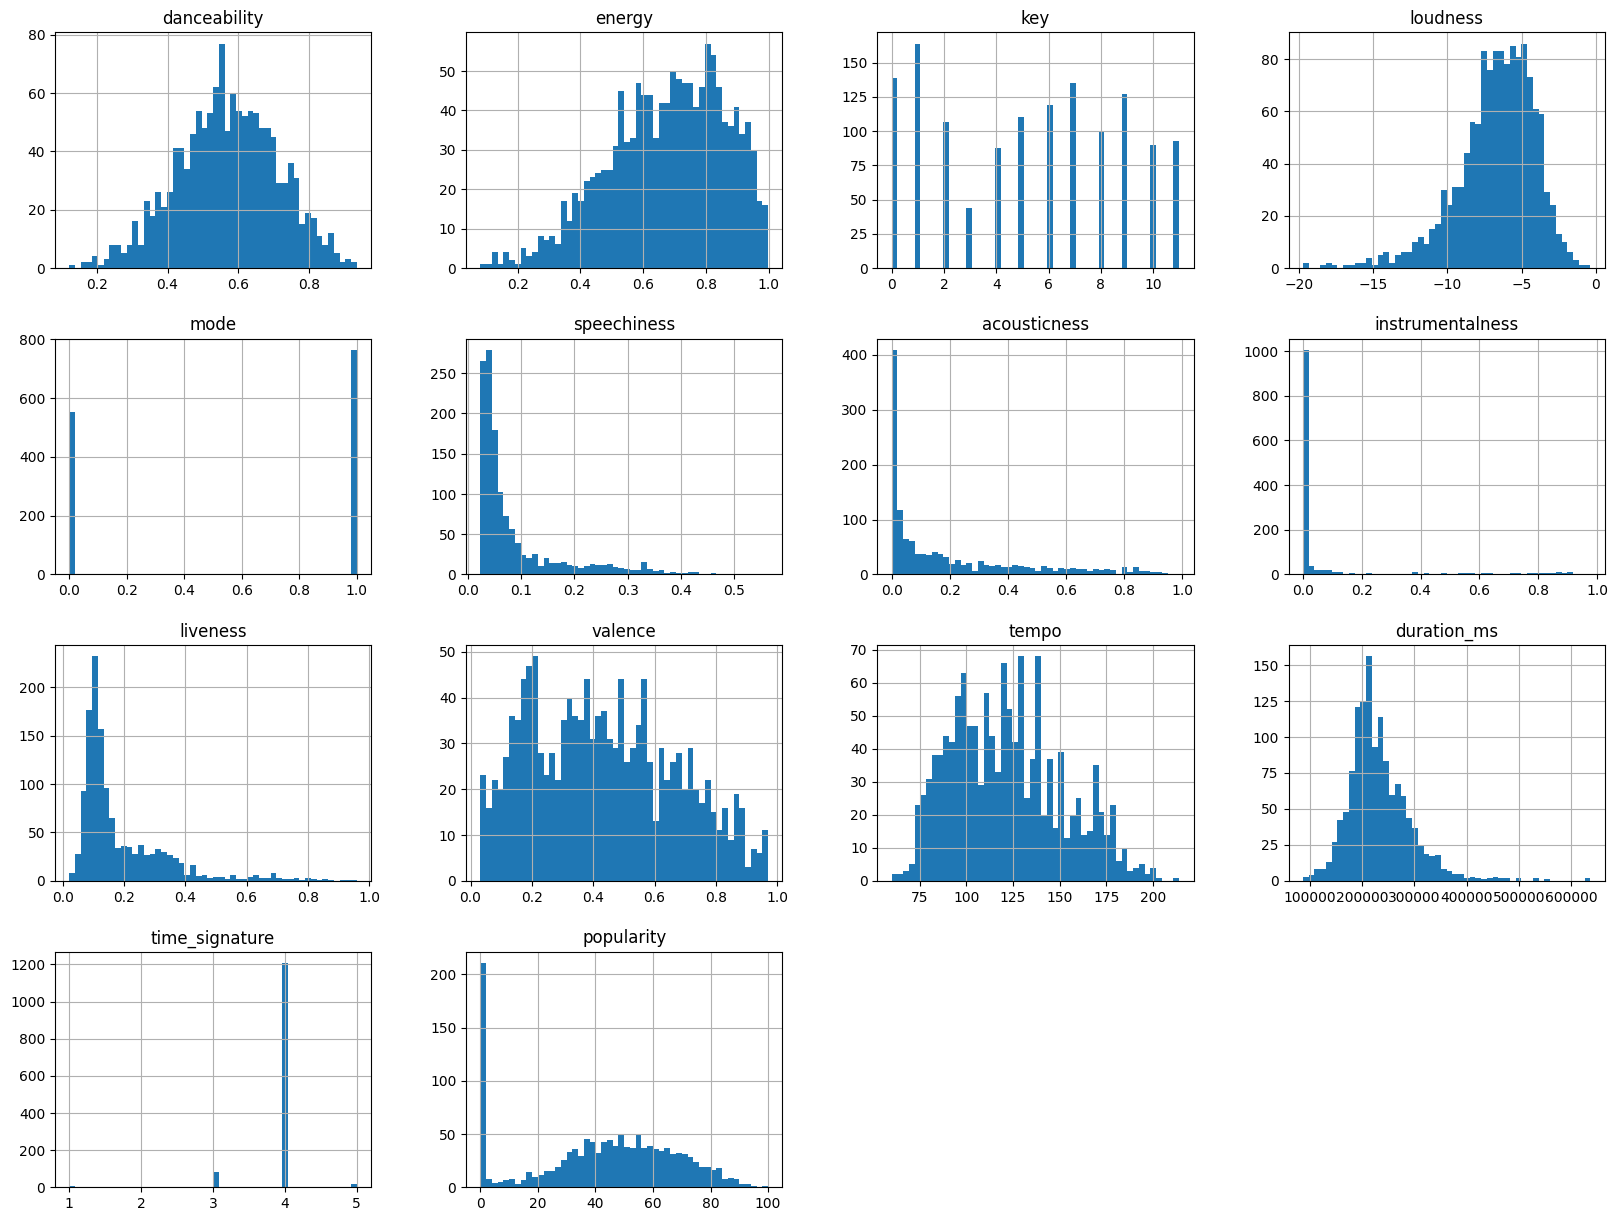

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show

<Axes: >

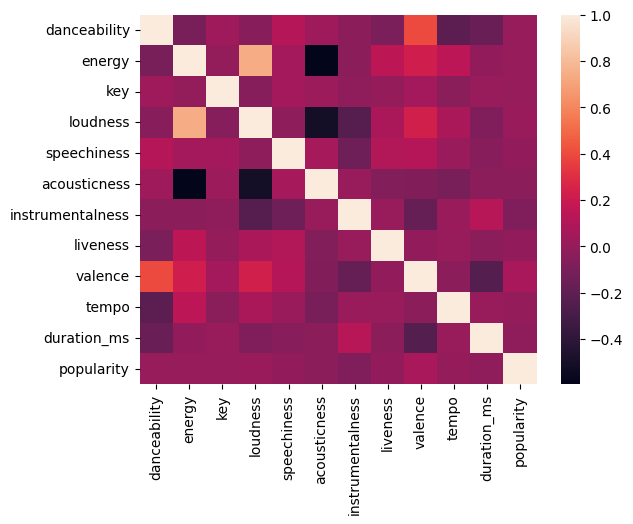

In [ ]:
#quickly looking through to see if there's any heavy correlation in the numeric data types, nothing too surprising
# eg.. loudness and energy are close, and acousticness is opposed to those two.

#dropping mode here because it looks useless
numeric_data = ["danceability","energy","key","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","popularity"]

sns.heatmap(df[numeric_data].corr())


<Figure size 640x480 with 0 Axes>

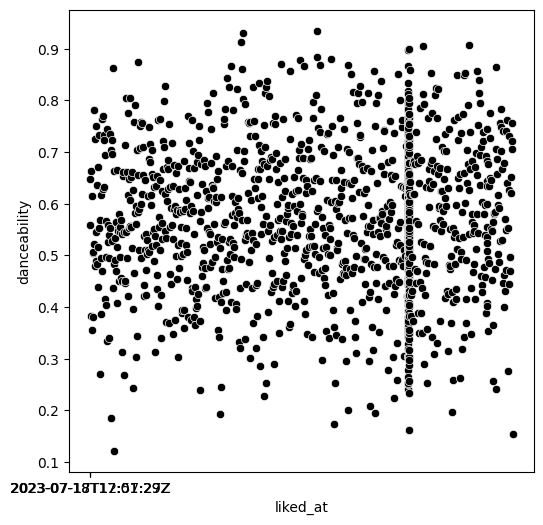

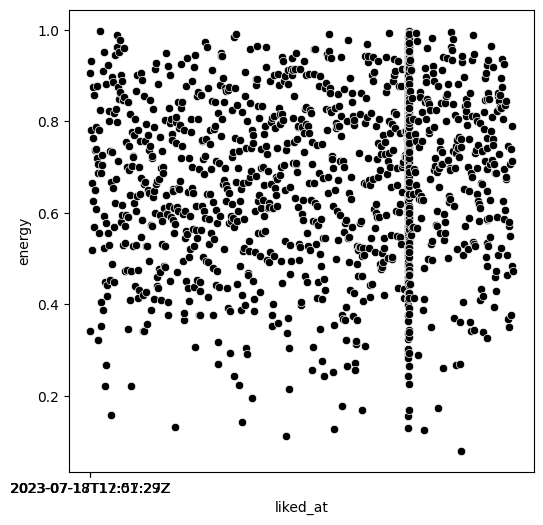

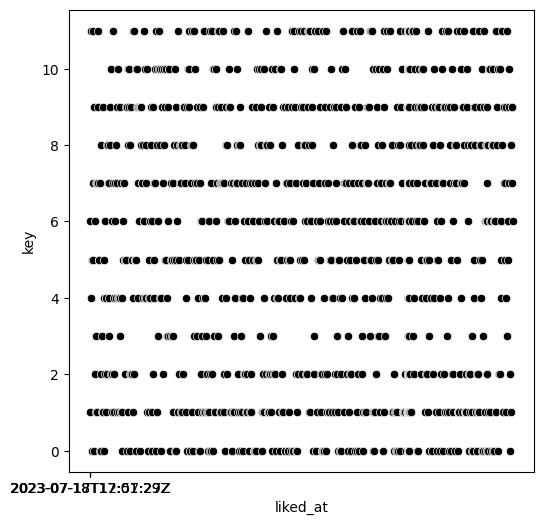

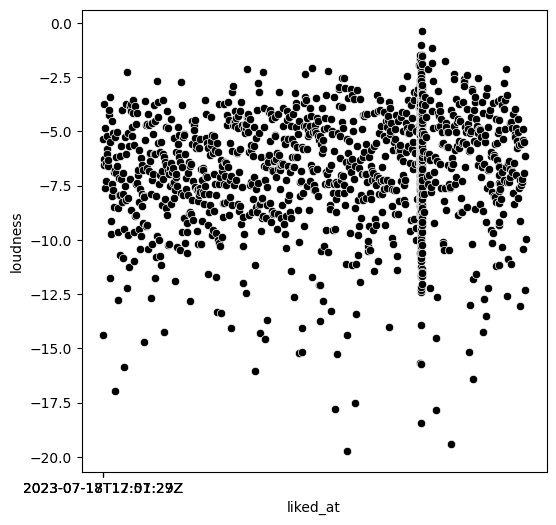

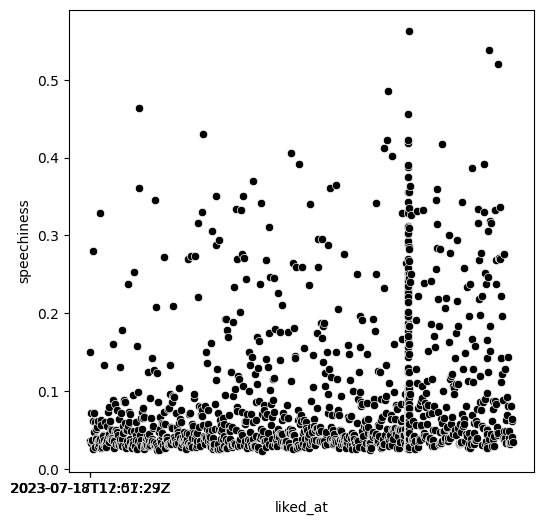

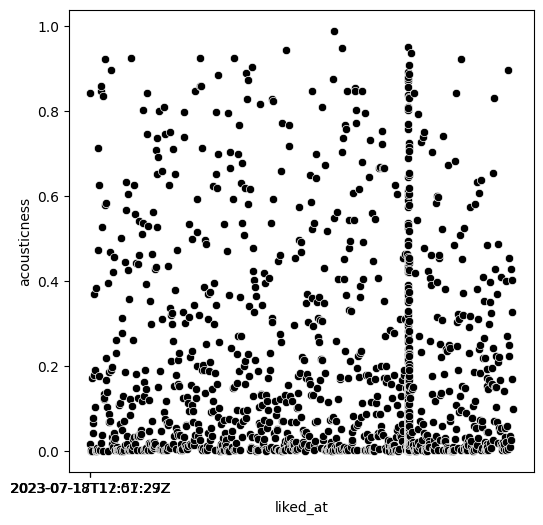

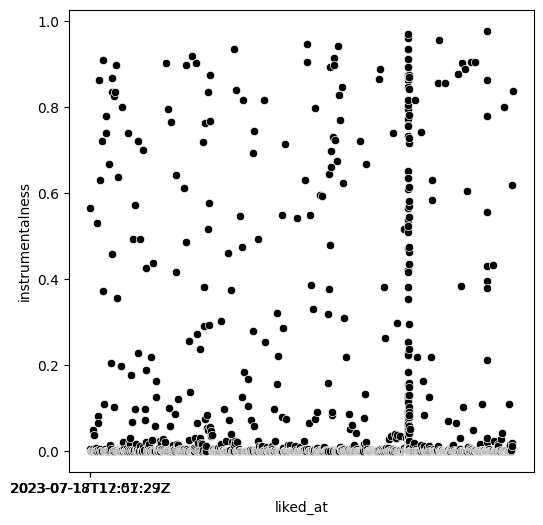

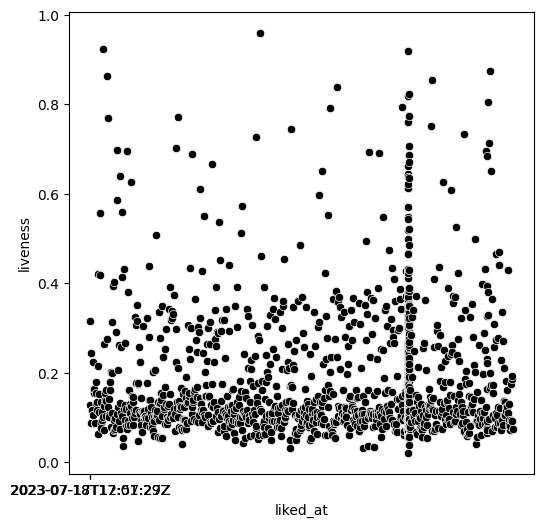

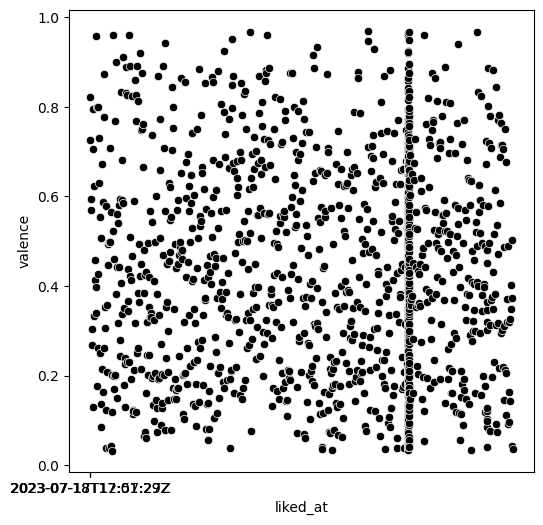

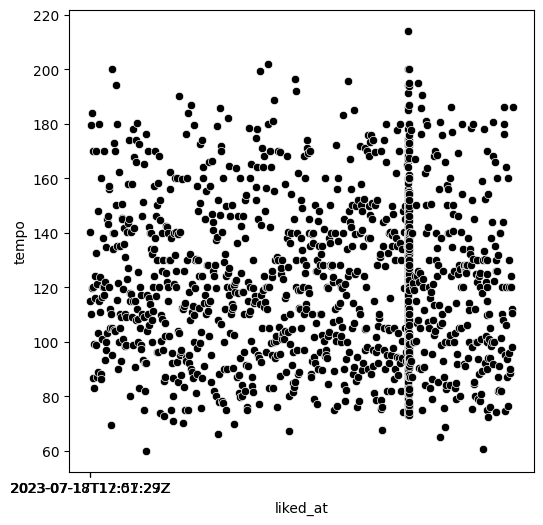

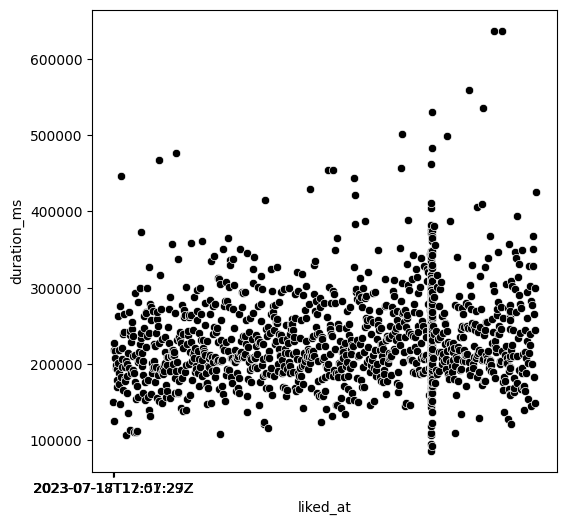

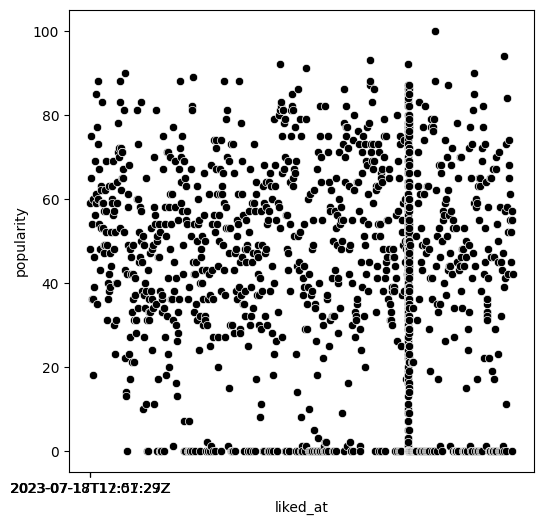

In [14]:
#Seeing if my music tastes have changed over time based on just the numeric data
# and when I liked the songs.  I think this is a mostly null result, so nothing too
# exciting here and going to move on to genre observations
plt.close('all')


for idx,stat in enumerate(numeric_data):
    plt.figure(idx)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(ax.get_xticks()[::2])
    sns.scatterplot(
        data=df,
        x="liked_at",
        y=stat,
        color="k",
        ax=ax
    )
    
plt.show()

In [ ]:
#A review of genre counts to see what is most common among my liked songs,

df['genres'] = df['genres'].apply(eval)
expanded_df = df.explode('genres')
pd.set_option("display.max_rows", None)
expanded_df['genres'].value_counts()

genres
rap                                119
hip hop                            118
edm                                111
rock                               101
pop                                 99
indietronica                        92
pop dance                           76
modern rock                         70
post-grunge                         68
alternative metal                   64
electro house                       64
alternative rock                    61
conscious hip hop                   60
permanent wave                      56
electropop                          55
complextro                          54
underground hip hop                 50
art pop                             48
indie rock                          46
indie pop                           46
nu metal                            43
metropopolis                        43
indie poptimism                     43
pop punk                            41
progressive house                   39
melodic dubstep   

In [15]:
#A quick widget to better explore my song taste by genre
from ipywidgets import interact 
def fetch_songs(genre): 
    relevant_cells = expanded_df[expanded_df['genres'] == genre]
    return relevant_cells[['artists','name','liked_at']]
interact(fetch_songs, genre=expanded_df.genres.unique()); 

interactive(children=(Dropdown(description='genre', options=('future funk', 'kawaii future bass', 'vaporwave',…